#2η Σειρά Ασκήσεων - Ομάδα 65
> Αριστείδης Βασιλάκης 03116142

> Δημήτριος Μυλωνάκης 03115742

> Ευγένι Δούφας 03115728


# 1ο Μέρος



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import collections
import joblib
from sklearn.metrics.pairwise import cosine_similarity

## Εισάγουμε το υποσύνολο του Dataset ακολουθώντας την διαδικασία που υποδεικνύεται στην εκφώνηση.

In [ ]:
dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

In [ ]:
team_seed_number = 65

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

## Τρέχουμε αρχικά την TF-IDF Vectorizer χωρίς βελτιστοποιήσεις

Για να έχουμε αυτές τις επιδόσεις ως σημείο αναφοράς.

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

In [ ]:
ID = 140
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['The Jailhouse']
['"Thriller",  "Mystery",  "Horror"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0

## Συνάρτηση Συστήματος Συστάσεων (content_recommender)

In [ ]:
def get_index(target_movie):
  for x in range(0,5000):
    if my_index[x]==target_movie:
      return x
      
def movie_print(target_movie):
  index=get_index(target_movie)
  print("ID: ", target_movie, ", Title: ", titles.flatten()[index], "Category : ", categories.flatten()[index])
  print("Summary: ", summaries.flatten()[index], "\n")

def content_recommender(target_movie, max_recommendations):
  index=get_index(target_movie)
  scores=cosine_similarity(corpus_tf_idf[index], corpus_tf_idf)
  descending=np.argsort(scores.flatten())[::-1]
  print("Getting ", max_recommendations, " recommendations for movie:\n")
  movie_print(target_movie)
  print("These are:\n")
  for i in range(0, max_recommendations):
    movie_print(my_index[descending[i+1]])


### Δοκιμή Νο1

Χωρίς βελτιστοποίηση. Θα δοκιμάσουμε δύο ταινίες στόχους

Οι 6 επόμενες ταινίες συνδέονται μεταξύ τους διότι μιλάνε για σχολεία αλλά δεν φαινεται να παρουσιάζεται άλλη σημαντική ομοιότητα μεταξύ τους.

In [ ]:
content_recommender(823, 5)

Getting  5  recommendations for movie:

ID:  823 , Title:  Our Time Category :  "Drama"
Summary:  Penfield was a girls school in 1955. The curriculum ranged from Latin to Etiquette, from Shakespeare to Field Hockey. Abigail is one of the new girls coming in to learn about these and other subjects. Coming from a well to do family, she hopes to be the school's best student. Just as she is getting started in the school, she meets Michael, a male student in the school. Soon the two fall deeply in love, but their relationship becomes challenged by those around them, leading to difficulties and tragedy. 

These are:

ID:  21776 , Title:  St. Trinian's Category :  "Crime Comedy",  "Comedy"
Summary:   The film opens with Annabelle Fritton being admitted to St Trinians by her aunt Camilla and her father Carnaby. She is terribly depressed, and after being knocked out of the way by a rush of girls, she meets head girl Kelly Jones who shows her around the school and introduces her to various cliqu

Οι 6 επόμενες ταινίες δεν συνδέονται ξεκάθαρα και έντονα με κάποια έννοια. Παρατηρείται ότι σε αρκετά αποτελέσματα υπάρχει το όνομα Diana (δεν είναι επιθυμητό γενικά να επιστρέφονται αποτελέσματα με βάση αυτή την ομοιότητα.

In [ ]:
content_recommender(4147, 5)

Getting  5  recommendations for movie:

ID:  4147 , Title:  Mangiati Vivi Category :  "Exploitation",  "Horror",  "World cinema",  "Splatter film"
Summary:  The film begins with a woman named Sheila who is searching for her sister, who has disappeared in the southeastern jungles of Asia . Sheila  joins up with Mark , and they both encounter many perils while searching for Sheila's sister, Diana. Diana has joined a cult run by a man called Jonas, played by Ivan Rassimov. Jonas physically and sexually abuses his followers and local people alike. In one graphic scene, he rapes Sheila with a dildo covered in snake blood, and decapitates a native. In another, a native widow named Mowara  is ritualistically raped after her late husband's body is burned on a pyre. A group, consisting of Mowara, Mark, Sheila and Diana escapes into the jungle, where Diana & Mowara are caught by a group of cannibals, Diana raped, and then both hacked to death, while Mark and Sheila helplessly watch from the cove

### Δοκιμή Νο2

Θα δοκιμάσουμε αρχικά τη στοιχειώδη βελτιστοποίηση που περιλαμβάνει την αφαίρεση των stopwords (english) και των σημείων στίξης.

Δημιουργόυμε μια συνάρτηση για το text preprocessing που θα χρησιμοποιήσει ο vectorizer.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words


def textprep(input):
  words = nltk.word_tokenize(input)
  filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]
  filtered_words = thorough_filter(filtered_words)
  return filtered_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Και δημιουργούμε ξανά το μοντέλο.

In [ ]:
%%time
vectorizer = TfidfVectorizer(analyzer='word', tokenizer=textprep)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CPU times: user 5min 52s, sys: 38.4 s, total: 6min 30s
Wall time: 6min 31s


Δοκιμάζουμε για τις ίδιες ταινίες στόχους ξανά.

Για την πρώτη ταινία πάλι το σχολείο σαν έννοια ενώνει τα αποτελέσματα με τον στοχό αλλά παρατηρείται ακόμα πιο έντονη η παρουσία του σχολείου σαν θέμα στα αποτελέσματα σε σχέση με πριν. Ειναι αναμενόμενο αυτό αν σκεφτει κανείς πως με τις στοιχειώδεις βελτιώσεις που κάναμε, μειώσαμε τον "θόρυβο" απο stopwords και σημεία στίξης που δεν μας ενδιέφεραν. Επομένως, εφόσον η λεξη school αναφέρεται πολλές φορες στη περιληψη της ταινίας στόχου, τα αποτελέσματα που ζητήσαμε (που είναι οι 5 πιο "κοντινές" ταινίες) θα είναι ταινίες με έντονη θεματική το σχολείο.

In [ ]:
content_recommender(823, 5)

Getting  5  recommendations for movie:

ID:  823 , Title:  Our Time Category :  "Drama"
Summary:  Penfield was a girls school in 1955. The curriculum ranged from Latin to Etiquette, from Shakespeare to Field Hockey. Abigail is one of the new girls coming in to learn about these and other subjects. Coming from a well to do family, she hopes to be the school's best student. Just as she is getting started in the school, she meets Michael, a male student in the school. Soon the two fall deeply in love, but their relationship becomes challenged by those around them, leading to difficulties and tragedy. 

These are:

ID:  19288 , Title:  Boys to Board Category :  "Silent film",  "Indie",  "Black-and-white",  "Short Film",  "Comedy",  "Family Film"
Summary:  A kindly old school teacher helps the gang escape from his wife’s miserable boarding school. While escaping, they run afoul of a bootlegger, who captures them and ties them up until the old school teacher rescues them just before the sher

Όσο αφορά την επόμενη ταινία, παρατηρείται ακόμα περισσότερο το όνομα Diana στα αποτελέσματα (ακόμα επιστρέφοντας και εντελώς ασχετες ταινίες όπως το Swingers) λόγω της μείωσης του προαναφερθέντος "θορύβου". 

In [ ]:
content_recommender(4147, 5)

Getting  5  recommendations for movie:

ID:  4147 , Title:  Mangiati Vivi Category :  "Exploitation",  "Horror",  "World cinema",  "Splatter film"
Summary:  The film begins with a woman named Sheila who is searching for her sister, who has disappeared in the southeastern jungles of Asia . Sheila  joins up with Mark , and they both encounter many perils while searching for Sheila's sister, Diana. Diana has joined a cult run by a man called Jonas, played by Ivan Rassimov. Jonas physically and sexually abuses his followers and local people alike. In one graphic scene, he rapes Sheila with a dildo covered in snake blood, and decapitates a native. In another, a native widow named Mowara  is ritualistically raped after her late husband's body is burned on a pyre. A group, consisting of Mowara, Mark, Sheila and Diana escapes into the jungle, where Diana & Mowara are caught by a group of cannibals, Diana raped, and then both hacked to death, while Mark and Sheila helplessly watch from the cove

### Δοκιμή Νο3

Θα δοκιμάσουμε να βελτιώσουμε την επίδοση του μοντέλου κάνοντας stemming ή lemmatization. Μιας και έχουν πολύ παρόμοια δράση, επιλέγουμε απευθείας lemmatization διότι είναι γνωστό πως δίνει μεγαλύτερη ακριβεια (ενω το stemming ανακληση). Δεδομένου ότι το μοντέλο επιλέγει ανάμεσα σε 5000 ταινίες έναν συνήθως πολύ μικρό αριθμό για να μας προτείνει (εφόσον δεν έχει νόημα μια εφαρμογή προτάσεων ταινιών να προτείνει 100αδες ταινίες), είναι σημαντικότερο τα λίγα αυτά αποτελεσματα που παίρνουμε να είναι όντως συναφή με την ταινία-στόχο παρά να είναι αποδοτικό το μοντέλο στο να ανιχνεύει όσο το δυνατό περισσότερες ταινίες απο όσες όντως έχουν συνάφεια με την ταινία που του δώσαμε.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

def textprep(input):
  words = nltk.word_tokenize(input)
  filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]
  filtered_words = thorough_filter(filtered_words)
  lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
  return lem_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', tokenizer=textprep)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Δοκιμάζοντας τη πρώτη ταινία παρατηρούμε σχεδόν τα ίδια αποτελέσματα.

In [ ]:
content_recommender(823, 5)

Getting  5  recommendations for movie:

ID:  823 , Title:  Our Time Category :  "Drama"
Summary:  Penfield was a girls school in 1955. The curriculum ranged from Latin to Etiquette, from Shakespeare to Field Hockey. Abigail is one of the new girls coming in to learn about these and other subjects. Coming from a well to do family, she hopes to be the school's best student. Just as she is getting started in the school, she meets Michael, a male student in the school. Soon the two fall deeply in love, but their relationship becomes challenged by those around them, leading to difficulties and tragedy. 

These are:

ID:  19288 , Title:  Boys to Board Category :  "Silent film",  "Indie",  "Black-and-white",  "Short Film",  "Comedy",  "Family Film"
Summary:  A kindly old school teacher helps the gang escape from his wife’s miserable boarding school. While escaping, they run afoul of a bootlegger, who captures them and ties them up until the old school teacher rescues them just before the sher

Το ίδιο και για τη 2η ταινία. Το όνομα "Diana" παρατηρείται ακόμα πιο έντονα.

In [ ]:
content_recommender(4147, 5)

Getting  5  recommendations for movie:

ID:  4147 , Title:  Mangiati Vivi Category :  "Exploitation",  "Horror",  "World cinema",  "Splatter film"
Summary:  The film begins with a woman named Sheila who is searching for her sister, who has disappeared in the southeastern jungles of Asia . Sheila  joins up with Mark , and they both encounter many perils while searching for Sheila's sister, Diana. Diana has joined a cult run by a man called Jonas, played by Ivan Rassimov. Jonas physically and sexually abuses his followers and local people alike. In one graphic scene, he rapes Sheila with a dildo covered in snake blood, and decapitates a native. In another, a native widow named Mowara  is ritualistically raped after her late husband's body is burned on a pyre. A group, consisting of Mowara, Mark, Sheila and Diana escapes into the jungle, where Diana & Mowara are caught by a group of cannibals, Diana raped, and then both hacked to death, while Mark and Sheila helplessly watch from the cove

### Δοκιμή Νο4

Στη δοκιμή Νο4 θα γίνει αφαίρεση των ονομάτων. Θα χρησιμοποιήσουμε τις λίστες με ονόματα (μικρά) από [εδώ](https://github.com/smashew/NameDatabases/blob/master/NamesDatabases/first%20names/us.txt). Παρόλο που αυτή η βάση δεδομένων με τα ονόματα είναι σχετικά μικρή, ο χρόνος εκτέλεσης θα μεγαλώσει αρκετα. Για να έχουμε έχουμε μια εικόνα των πόσων ταινιών απο τις 5000 έχει επεξεργαστεί ο vectorizer δημιουργήθηκε παρακάτω η συνάρτηση counter που εκτυπώνει τον αριθμό των κλήσεων της textprep (γίνονται συνολικά 10000).

Tα αποτελέσματα βελτιώνονται εντυπωσιακά σε αυτή τη δοκιμή και θεωρούνται επαρκώς ικανοποιητικά για τις ανάγκες της άσκησης.

In [ ]:
from google.colab import files
files.upload()

Saving us.txt to us.txt


{'us.txt': b'Aaron\r\nAbbey\r\nAbbie\r\nAbby\r\nAbdul\r\nAbe\r\nAbel\r\nAbigail\r\nAbraham\r\nAbram\r\nAda\r\nAdah\r\nAdalberto\r\nAdaline\r\nAdam\r\nAdan\r\nAddie\r\nAdela\r\nAdelaida\r\nAdelaide\r\nAdele\r\nAdelia\r\nAdelina\r\nAdeline\r\nAdell\r\nAdella\r\nAdelle\r\nAdena\r\nAdina\r\nAdolfo\r\nAdolph\r\nAdria\r\nAdrian\r\nAdriana\r\nAdriane\r\nAdrianna\r\nAdrianne\r\nAdrien\r\nAdriene\r\nAdrienne\r\nAfton\r\nAgatha\r\nAgnes\r\nAgnus\r\nAgripina\r\nAgueda\r\nAgustin\r\nAgustina\r\nAhmad\r\nAhmed\r\nAi\r\nAida\r\nAide\r\nAiko\r\nAileen\r\nAilene\r\nAimee\r\nAisha\r\nAja\r\nAkiko\r\nAkilah\r\nAl\r\nAlaina\r\nAlaine\r\nAlan\r\nAlana\r\nAlane\r\nAlanna\r\nAlayna\r\nAlba\r\nAlbert\r\nAlberta\r\nAlbertha\r\nAlbertina\r\nAlbertine\r\nAlberto\r\nAlbina\r\nAlda\r\nAlden\r\nAldo\r\nAlease\r\nAlec\r\nAlecia\r\nAleen\r\nAleida\r\nAleisha\r\nAlejandra\r\nAlejandrina\r\nAlejandro\r\nAlena\r\nAlene\r\nAlesha\r\nAleshia\r\nAlesia\r\nAlessandra\r\nAleta\r\nAletha\r\nAlethea\r\nAlethia\r\nAlex\r\nAlex

In [ ]:
ffile = open("us.txt")
fnames = [line.rstrip('\n').lower() for line in ffile]

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

x=0

def counter():
    global x
    if x%100==0:
        print(x)
    x=x+1

def textprep(input):
  words = nltk.word_tokenize(input)
  filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation) + fnames]
  filtered_words = thorough_filter(filtered_words)
  lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
  counter()
  return lem_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', tokenizer=textprep)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


####Ταινία-Στοχος #1 : Our Time

Εδώ η κοινή θεματική είναι οι ζωές μαθητών σε σχολεία. 

In [ ]:
content_recommender(823, 5)

Getting  5  recommendations for movie:

ID:  823 , Title:  Our Time Category :  "Drama"
Summary:  Penfield was a girls school in 1955. The curriculum ranged from Latin to Etiquette, from Shakespeare to Field Hockey. Abigail is one of the new girls coming in to learn about these and other subjects. Coming from a well to do family, she hopes to be the school's best student. Just as she is getting started in the school, she meets Michael, a male student in the school. Soon the two fall deeply in love, but their relationship becomes challenged by those around them, leading to difficulties and tragedy. 

These are:

ID:  19441 , Title:  Desperate Lives Category :  "Drama"
Summary:  The Cameron family seems, on the surface, to be the perfect family, but things are not as they seem. Their two teenage kids, Scott and Sandy, fall in with the wrong crowds at their high school, both eventually getting involved with drug experimentation. In a disturbing turn of events, Sandy, after ingesting angel

####Ταινία-Στοχος #2 : Magniati Vivi

Οι παρακάτω ταινίες αφορούν περιπέτειες/ιστορίες τρόμου με τις περισσότερες να διαδραματίζονται στη ζουγκλα. Σε αυτή τη ταινία είναι απόλυτα εμφανής η βελτίωση που επέφερε το φιλτράρισμα των ονομάτων διότι στη δοκιμή Νο3 είχαμε πολύ χειρότερες συστάσεις.

In [ ]:
content_recommender(4147, 5)

Getting  5  recommendations for movie:

ID:  4147 , Title:  Mangiati Vivi Category :  "Exploitation",  "Horror",  "World cinema",  "Splatter film"
Summary:  The film begins with a woman named Sheila who is searching for her sister, who has disappeared in the southeastern jungles of Asia . Sheila  joins up with Mark , and they both encounter many perils while searching for Sheila's sister, Diana. Diana has joined a cult run by a man called Jonas, played by Ivan Rassimov. Jonas physically and sexually abuses his followers and local people alike. In one graphic scene, he rapes Sheila with a dildo covered in snake blood, and decapitates a native. In another, a native widow named Mowara  is ritualistically raped after her late husband's body is burned on a pyre. A group, consisting of Mowara, Mark, Sheila and Diana escapes into the jungle, where Diana & Mowara are caught by a group of cannibals, Diana raped, and then both hacked to death, while Mark and Sheila helplessly watch from the cove

####Ταινία-Στοχος #3 : We Can't Change the World. But, We Wanna Build a School in Cambodia

Η θεματική εδώ είναι πάλι το σχολείο. Πάλι όπως στην ταινία στόχο #1 δεν φαίνεται να επηρεάζεται από "θόρυβο" απο λέξεις που συνυπολίγονται στην ομοιότητα αλλά δεν προσφέρουν ουσιαστική ομοιότητα.

In [ ]:
content_recommender(20621, 5)

Getting  5  recommendations for movie:

ID:  20621 , Title:  We Can't Change the World. But, We Wanna Build a School in Cambodia. Category :  "Drama"
Summary:  Kota is a medical school student who is doing badly for his examinations. He feels that something is missing in his life, but he is not sure what it is. One day, he chance upon a pamphlet asking for help with building schools for children in Cambodia, Kota decides to recruit his friends to complete the task. However, in order to build the school, they will have to raise 1.5 million yen by themselves. The group go down to work, finding sponsors and recruiting volunteers. They also plan to organize club parties as their fund-raising activity. All seems smooth going as they found an IT company that was willing to sponsor them, and got many interested people to help out. Kota also meets Kaori, a nursing student who studies at the same school, whom Kota starts to feel attracted to. After a unconvincing appeal for donations at their f

####Ταινία-Στοχος #4 : Return of the Gunslinger

Η θεματική εδώ είναι η ζωή στη περιοχή της κεντρικής Αμερικής σε περασμένους αιώνες. Οι ταινίες είναι κυρίως ταινίες δράσης.

In [ ]:
content_recommender(my_index[12], 5)

Getting  5  recommendations for movie:

ID:  15274 , Title:  Return of the Gunfighter Category :  "Western"
Summary:  An old gunslinger Wyatt and Ben Lee Sutton injured boy in love with a Mexican girl, Wyatt will teach you to use the gun, the young man now knows how to defend himself, he wants to avenge the murderers of his girlfriend's father .. Ben Wyatt will have to help and defend themselves against bandits, seeking the land of the Mexican girl. 

These are:

ID:  16171 , Title:  The Return of Ringo Category :  "Spaghetti Western"
Summary:  Giuliano Gemma plays a civil war soldier who returns home to find his family decimated. As if this wasn't enough, his property has been taken over by a family of Mexican bandits and his fiancee about to marry the Mexican gangster behind all this. He decides to go undercover disguised as a Mexican, and discovers he has a daughter. 

ID:  12096 , Title:  Romancing the Bride Category :  "Romantic comedy",  "Romance Film",  "Comedy",  "Television mo

####Ταινία-Στοχος #5 : Shock 'Em Dead

Η θεματική εδώ είναι ιστορίες απο μουσικά συγκροτήματα κυρίως.

In [ ]:
content_recommender(my_index[17], 5)

Getting  5  recommendations for movie:

ID:  6732 , Title:  Shock 'Em Dead Category :  "Thriller",  "Music",  "Horror"
Summary:  Angel Martin  has just made the deal of a lifetime. Fame, fortune and beautiful women will all be his - for a price. To become a rock star Martin must give his soul, and to survive he must feed on the souls of others. But Angel wants to possess more than just the soul of the woman of his dreams. Lindsay Roberts  is the manager of a rising rock band that has a talented new band member. When Angel Martin joined the band she suddenly had her hands full with concerts, contracts--and private meetings with Angel. But success isn't the only new thing in her life: their recent concerts have been marred by a series of brutal killings, which remain unsolved. As Angel lures Lindsay further into his dark mysterious world--the lines are drawn for a terrifying black magic battle... against the ultimate evil. 

These are:

ID:  22029 , Title:  Leningrad Cowboys Meet Moses C

# 2ο Μέρος

##Δημιουργία dataset

In [2]:
!pip install --upgrade somoclu
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import collections
import joblib
from sklearn.metrics.pairwise import cosine_similarity
import somoclu
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

team_seed_number = 65

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

In [5]:

def sentence_tokenize(s):
  lemmatizer = WordNetLemmatizer() 
  stop_words = list(stopwords.words('english'))
  trans = str.maketrans('', '', string.punctuation)
  tokens = s.split()
  tokens = [token.translate(trans) for token in tokens]
  tokens = [token for token in tokens if token.isalpha()]
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  tokens = [lemmatizer.lemmatize(token,'v') for token in tokens]
  tokens = [lemmatizer.lemmatize(token,'a') for token in tokens]
  tokens = [lemmatizer.lemmatize(token,'r') for token in tokens]
  tokens = [lemmatizer.lemmatize(token,'s') for token in tokens]
  return ' '.join(tokens)

def build_final_set(doc_limit = 5000, tf_idf_only=False):
  # convert sparse tf_idf to dense tf_idf representation
  dense_tf_idf = corpus_optimized_tf_idf.toarray()[0:doc_limit,:]
  if tf_idf_only:
    final_set = dense_tf_idf
  else:
    # append the binary categories features horizontaly to the (dense) tf_idf features
    final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομένα σε float32
  return np.array(final_set, dtype=np.float32)

In [6]:
vectorizer_optimized = TfidfVectorizer(preprocessor=sentence_tokenize,min_df=0.03,max_df=0.8)
vectorizer_optimized.fit(corpus)
corpus_optimized_tf_idf = vectorizer_optimized.transform(corpus)

In [7]:
tf_idf_array_optimized = corpus_optimized_tf_idf.toarray()
print(len(tf_idf_array_optimized[0]))
print(vectorizer_optimized.get_feature_names()[:50])

808
['After', 'All', 'Although', 'American', 'An', 'As', 'At', 'Back', 'Before', 'But', 'Captain', 'City', 'Despite', 'Dr', 'During', 'Eventually', 'Finally', 'He', 'Her', 'His', 'However', 'In', 'It', 'John', 'Just', 'Later', 'London', 'Meanwhile', 'Mr', 'New', 'Now', 'On', 'Once', 'One', 'She', 'Soon', 'States', 'That', 'The', 'Their', 'Then', 'There', 'They', 'This', 'To', 'Two', 'US', 'United', 'Upon', 'War']


In [8]:
final_set = build_final_set()
final_set.shape

(5000, 1130)

## Εκπαίδευση Χάρτη SOM

Στο σημείο αυτό έχουμε δημιουργήσει το set μας βελτιστοποιημένο.Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά κάτι που θα καθιστούσε το χρόνο εκπαίδευσης som απαγορευτικά μεγάλο, καταφέραμε να μειώσουμε το μέγεθος σε περίπου 1100. Στη συνέχεια εκπαιδεύουμε τα δεδομένα σε χάρτες 10x10, 20x20, 25x25 και 30x30. Μόνο στο 30x30 επιλέγουμε όλο το πλήθος των δεδομένων για να αποφύγουμε το μεγάλο χρόνο εκτέλεσης, ενώ στα υπόλοιπα επιλέγεται υποσύνολο αυτών (2000).

In [9]:
for n_rows, n_columns, n_samples in [[10,10,2000],[20,20,2000],[25,25,2000],[30,30,5000]]:
  som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, maptype = 'planar', verbose = 2)
  %time som.train(final_set[:n_samples], epochs = 100)
  joblib.dump(som, 'som' + str(n_rows) + '-' + str(n_columns) + '-' + str(n_samples) +'.pkl') 

CPU times: user 1min 10s, sys: 116 ms, total: 1min 10s
Wall time: 35.9 s
CPU times: user 4min 44s, sys: 550 ms, total: 4min 45s
Wall time: 2min 24s
CPU times: user 7min 21s, sys: 863 ms, total: 7min 22s
Wall time: 3min 50s
CPU times: user 26min 21s, sys: 3.6 s, total: 26min 25s
Wall time: 13min 22s


In [10]:
!ls

sample_data	   som20-20-2000.pkl  som30-30-5000.pkl
som10-10-2000.pkl  som25-25-2000.pkl


In [23]:
som = joblib.load('som20-20-2000.pkl')
bmus = som.bmus
print(bmus.shape)
print(bmus)

(2000, 2)
[[17  4]
 [17  4]
 [17  4]
 ...
 [16 19]
 [ 3 19]
 [11 10]]


In [24]:
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
# το return_inverse επιστρέφει και τους δείκτες indices

print(indices)
print(ubmus.shape)
print(ubmus)

[259 259 259 ... 255  65 172]
(307, 2)
[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  4]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 16]
 [ 1 19]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2 10]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 17]
 [ 2 19]
 [ 3  0]
 [ 3  1]
 [ 3  3]
 [ 3  5]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 18]
 [ 3 19]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  6]
 [ 4  9]
 [ 4 10]
 [ 4 11]
 [ 4 13]
 [ 4 14]
 [ 4 17]
 [ 4 18]
 [ 4 19]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  3]
 [ 5  4]
 [ 5  5]
 [ 5  7]
 [ 5  9]
 [ 5 10]
 [ 5 12]
 [ 5 14]
 [ 5 15]
 [ 5 16]
 [ 5 17]
 [ 5 19]
 [ 6  0]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  6]
 [ 6  7]
 [ 6  9]
 [ 6 11]
 [ 6 12]
 [ 6 13]
 [ 6 15]
 [ 6 18]
 [ 6 19

Αρχικά ελέγχουμε τον χάρτη για 20x20 σε λιγότερα δεδομένα. Παρατηρούμε πως ενώ έχουμε 400 νευρώνες εχουμε 307 ubmus , διότι σε μερικούς νευρώνες δεν έχουν ανατεθεί ταινίες.

## Ομαδοποίηση (Clustering)

Αναθέτουμε στον αλγόριθμο k-Means να αναλάβει το clustering στο χάρτη για k=10 και k=20

In [25]:
from sklearn.cluster import KMeans

algorithm = KMeans(n_clusters = 10)
som.cluster(algorithm=algorithm)
joblib.dump(som, 'som_10.pkl')

algorithm = KMeans(n_clusters = 20)
som.cluster(algorithm=algorithm)

joblib.dump(som, 'som_20.pkl')

['som_20.pkl']

In [26]:
def get_number_of_neurons(som):
    cluster_counter = [0] * (np.max(som.clusters)+1)
    # Initialize 
    clusterslist = []
    for i in range(np.max(som.clusters)+1):
        clusterslist.append([])
    # Fill the list
    x1, x2 = np.shape(som.clusters)
    for i in range(x1):
        for j in range(x2):
            item = som.clusters[i][j]
            clusterslist[item].append([i,j])
            cluster_counter[item] += 1
    # Sort depending on #neurons 
    cluster_neurons = np.argsort(cluster_counter,axis=0)
    for idx in cluster_neurons[::-1]:
        print(f'Cluster index:{idx} -> {len(clusterslist[idx])}')
        
    return cluster_counter

Παρακάτω παρατηρούμε τις επιμέρους περιοχές που έχουν δημιουγηθεί. Διακρίνουμε σημεία με μπλε/λαχανί χρώμα το οποία περιτριγυρίζονται από κίτρινο/κόκκινο. Αυτά είναι περιοχές που έχουν ανατεθεί σε ταινίες κοντινού περιεχομένου.

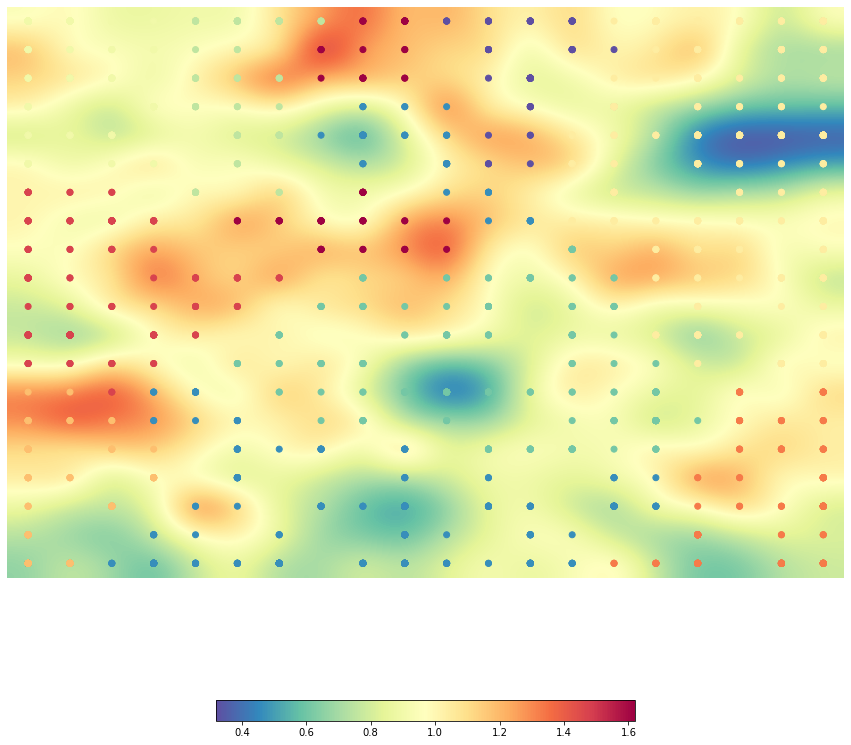

[[4 4 4 4 3 3 3 3 9 9 0 0 0 0 5 5 5 5 5 5]
 [4 4 4 4 3 3 3 9 9 9 0 0 0 0 0 5 5 5 5 5]
 [4 4 4 4 3 3 3 9 9 9 0 0 0 0 5 5 5 5 5 5]
 [4 4 4 4 3 3 3 1 1 1 1 0 0 5 5 5 5 5 5 5]
 [4 4 4 4 3 3 3 1 1 1 1 0 0 5 5 5 5 5 5 5]
 [4 4 4 4 3 3 3 1 1 1 1 0 0 5 5 5 5 5 5 5]
 [8 8 8 8 3 3 3 9 9 9 1 1 1 5 5 5 5 5 5 5]
 [8 8 8 8 8 9 9 9 9 9 9 1 1 5 5 5 5 5 5 5]
 [8 8 8 8 8 8 9 9 9 9 9 2 2 2 5 5 5 5 5 5]
 [8 8 8 8 8 8 8 2 2 2 2 2 2 2 2 5 5 5 5 5]
 [8 8 8 8 8 8 2 2 2 2 2 2 2 2 2 5 5 5 5 5]
 [8 8 8 8 8 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5]
 [8 8 8 8 1 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5]
 [6 6 8 1 1 1 2 2 2 2 2 2 2 2 2 2 2 7 7 7]
 [6 6 6 1 1 1 1 2 2 2 2 2 2 2 2 2 2 7 7 7]
 [6 6 6 6 1 1 1 1 1 1 2 2 2 2 2 2 7 7 7 7]
 [6 6 6 6 1 1 1 1 1 1 1 1 2 2 1 1 7 7 7 7]
 [6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7]
 [6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7]
 [6 6 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7]]


In [28]:
som = joblib.load('som_10.pkl')
som.view_umatrix(bestmatches=True, figsize=(15, 15), colorbar = True)

print(som.clusters)

In [29]:
# Call the function
get_number_of_neurons(som)

Cluster index:5 -> 77
Cluster index:1 -> 77
Cluster index:2 -> 70
Cluster index:8 -> 38
Cluster index:7 -> 29
Cluster index:4 -> 24
Cluster index:9 -> 22
Cluster index:6 -> 22
Cluster index:3 -> 22
Cluster index:0 -> 19


[19, 77, 70, 22, 24, 77, 22, 29, 38, 22]

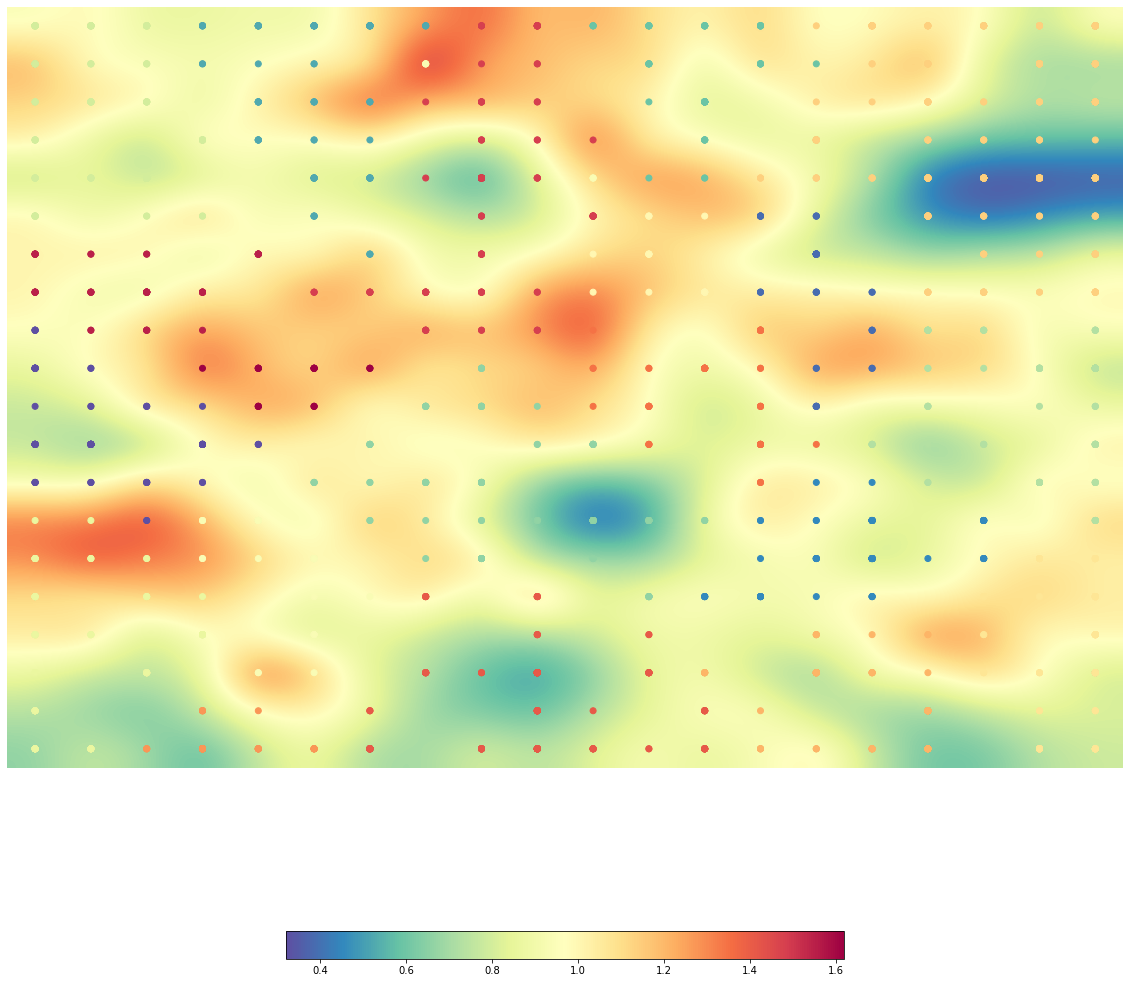

[[ 7  7  7  3  3  3  3  3 17 17  4  4  4  4 12 12 12 12 12 12]
 [ 7  7  7  3  3  3  3  9 17 17  4  4  4  4  4 12 12 12 12 12]
 [ 7  7  7  7  3  3  3 17 17 17 17  4  4  4 12 12 12 12 12 12]
 [ 7  7  7  7  3  3  3 17 17 17 17  4  4 12 12 12 12 12 12 12]
 [ 7  7  7  7  3  3  3 17 17 17  9  4  4 12 12 12 12 12 12 12]
 [ 7  7  7  7 18  3  3 17 17 17 17 10 10  1  1 12 12 12 12 12]
 [18 18 18 18 18 18  3 17 17 17 10 10 10  1  1  1 12 12 12 12]
 [18 18 18 18 18 17 17 17 17 17 10 10 10  1  1  1 12 12 12 12]
 [ 0 18 18 18 19 19 17 17 17 17 15 15 15 15  1  1  6  6  6  6]
 [ 0  0  0 19 19 19 19  5  5  5 15 15 15 15  1  1  6  6  6  6]
 [ 0  0  0  0 19 19  5  5  5  5 15 15 15 15  1  6  6  6  6  6]
 [ 0  0  0  0  0  5  5  5  5  5  5 15 15 15 15  6  6  6  6  6]
 [ 0  0  0  0  9  5  5  5  5  5  5  5  5 15  2  2  6  6  6  6]
 [ 8  8  0  9  9  9  5  5  5  5  5  5  5  2  2  2  2  2  6  6]
 [ 8  8  8  9  9  9  9  5  5  5  5  5  5  2  2  2  2  2 11 11]
 [ 8  8  8  8  9  9  9 16 16 16  5  5  2  2  2  2  2 11

In [30]:
som = joblib.load('som_20.pkl')
som.view_umatrix(bestmatches=True, figsize=(20 , 20), colorbar = True)
print(som.clusters)

In [31]:
# Call the function
get_number_of_neurons(som)

Cluster index:12 -> 44
Cluster index:5 -> 36
Cluster index:17 -> 31
Cluster index:16 -> 28
Cluster index:6 -> 24
Cluster index:7 -> 22
Cluster index:8 -> 21
Cluster index:3 -> 21
Cluster index:13 -> 19
Cluster index:9 -> 18
Cluster index:0 -> 18
Cluster index:15 -> 17
Cluster index:2 -> 17
Cluster index:11 -> 16
Cluster index:4 -> 16
Cluster index:18 -> 15
Cluster index:1 -> 13
Cluster index:10 -> 8
Cluster index:14 -> 8
Cluster index:19 -> 8


[18, 13, 17, 21, 16, 36, 24, 22, 21, 18, 8, 16, 44, 19, 8, 17, 28, 31, 15, 8]

Βλέπουμε ότι για k = 20 γίνεται καλύτερο clustering. Στη συνέχεια οπτικοποιούμε το som για 30x30 χαρτη και 5000 δεδομένα για τα οποία θα γίνει και η σημασιολογική ανάλυση

## Clustering για 30x30 χάρτη σε όλο το πλήθος των δεδομένων

In [32]:
som = joblib.load('som30-30-5000.pkl')
bmus = som.bmus
print(bmus.shape)
print(bmus)

(5000, 2)
[[ 1  9]
 [ 4  8]
 [ 4  7]
 ...
 [26 23]
 [11 15]
 [ 1  4]]


In [33]:
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(indices)
print(ubmus.shape)
print(ubmus)

[ 32 108 107 ... 590 259  29]
(662, 2)
[[ 0  0]
 [ 0  1]
 [ 0  3]
 ...
 [29 27]
 [29 28]
 [29 29]]


Όμοια και δω παρατηρούμε ότι χρησιμοποιούνται οι 662/900 νευρώνες. Το clustering θα γίνει για k = 20 και k = 30.

In [57]:
som = joblib.load('som30-30-5000.pkl')
algorithm = KMeans(n_clusters = 20)
som.cluster(algorithm=algorithm)
joblib.dump(som, 'som_20_30.pkl')

algorithm = KMeans(n_clusters = 30)
som.cluster(algorithm=algorithm)

joblib.dump(som, 'som_30_30.pkl')

['som_30_30.pkl']

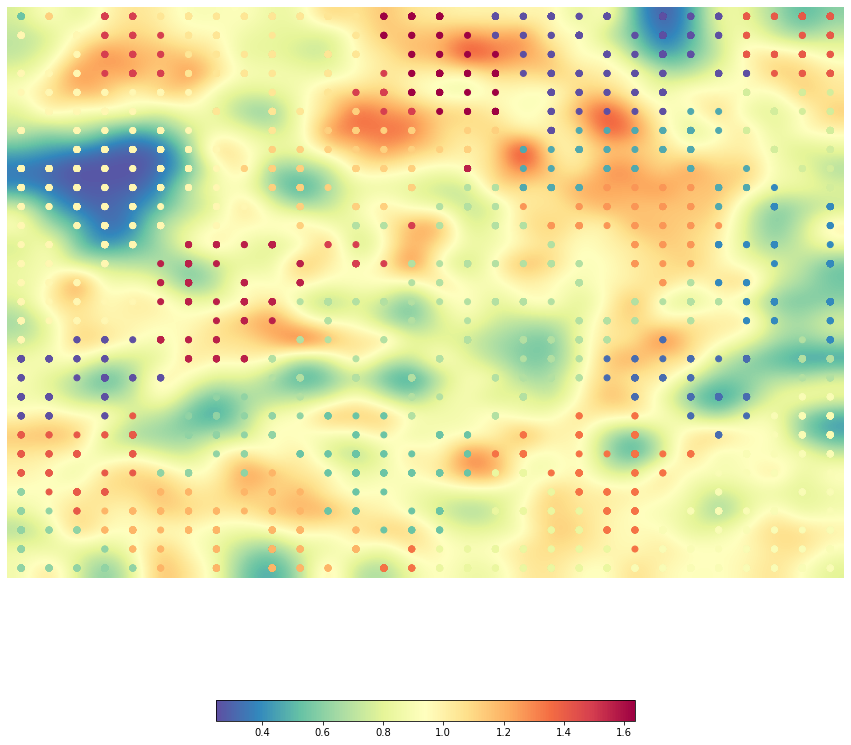

[[ 4 12 17 17 17 11 11 11 11 11 11 11 11 19 19 19 19  0  0  0  0  0  0  0
   0  0 16 16 16 16]
 [10 10 10 17 17 17 11 11 11 11 11 11 11 19 19 19 19  0  0  0  0  0  0  0
   0  0 16 16 16 16]
 [10 10 10 17 17 17 11 11 11 11 11 11 11 19 19 19 19 19  0  0  0  0  0  0
   0  0 16 16 16 16]
 [10 10 10 17 17 17 11 11 11 11 11 11 11 17 19 19 19 19  0  0  0  0  0  0
   0  0  0 16 16 16]
 [10 10 10 10 10 10 10 11 11 11 11 11 17 17 19 19 19 19  0  0  0  0  0  0
   0  0  7  7  7  7]
 [10 10 10 10 10 10 11 11 11 11 11 12 12 17 17 19 19 19  0  0  0  0  0  0
   3  3  7  7  7  7]
 [10 10 10 10 10 10 10 11 11 11 12 12 12 12 12 12 12 12  0  0  3  3  3  3
   3  3  7  7  7  7]
 [10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12 12  3  3  3  3  3  3
   3  3  7  7  7  7]
 [10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 18  6  3  3  3  3  3  3
   3  3  3  7  7  7]
 [10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12  6  6  3  3  3 14 14 14
  14  3  3  2  7  7]
 [10 10 10 10 10 10 10 10 10 12 12 12 12 12 12  6 

In [42]:
som = joblib.load('som_20_30.pkl')
som.view_umatrix(bestmatches=True, figsize=(15, 15), colorbar = True)

print(som.clusters)

In [43]:
print(get_number_of_neurons(som))

Cluster index:6 -> 126
Cluster index:10 -> 99
Cluster index:0 -> 75
Cluster index:9 -> 53
Cluster index:12 -> 44
Cluster index:5 -> 43
Cluster index:11 -> 42
Cluster index:13 -> 41
Cluster index:15 -> 40
Cluster index:4 -> 39
Cluster index:18 -> 37
Cluster index:16 -> 36
Cluster index:2 -> 35
Cluster index:1 -> 32
Cluster index:3 -> 31
Cluster index:14 -> 29
Cluster index:8 -> 29
Cluster index:17 -> 24
Cluster index:19 -> 24
Cluster index:7 -> 21
[75, 32, 35, 31, 39, 43, 126, 21, 29, 53, 99, 42, 44, 41, 29, 40, 36, 24, 37, 24]


In [70]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

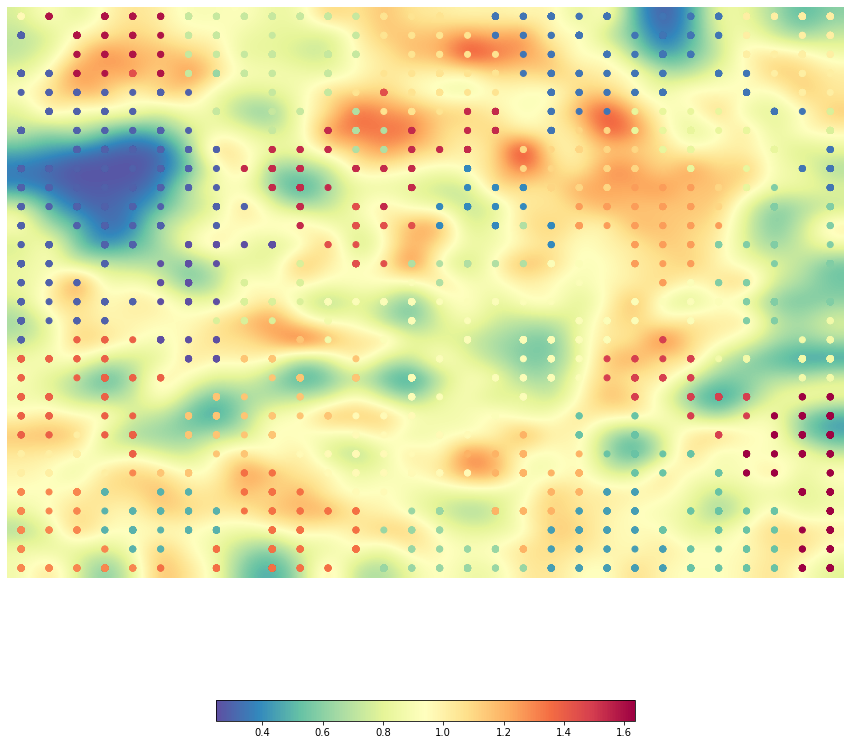

[[15 28 28 28 28 28 10 10 10 10 10 10 10 17 17 17 17  2  2  2  2  2  2  2
   2  2 16 16 16 16]
 [ 1 28 28 28 28 28 10 10 10 10 10 10 10 17 17 17 17  2  2  2  2  2  2  2
   2  2 16 16 16 16]
 [ 1 28 28 28 28 28 10 10 10 10 10 10 10 17 17 17 17 17  2  2  2  2  2  2
   2  2 16 16 16 16]
 [ 1  1 28 28 25 28 10  8 10 10 10 10 10 17 17 17 17 17  2  2  2  2  2  2
   2  2  2 16 16 16]
 [ 1  1  1  1  1  1  1  8 10 10 10 10 17 25 17 17 17 17  2  2  2  2  2  2
   2  2  2  2 16 16]
 [ 1  1  1  1  1  1  8 10 10 10 10 10  9 17 17 17 27 27  2  2  2  2 12 12
  12 12  2  2  2 11]
 [ 1  1  1  1  1  1  1  8 10 10 27 27  9  9 27 27 27 27 18  2 18 18 12 12
  12 12 12 12 11 11]
 [ 1  1  1  1  1  1  1  1 27 27 27 27  9  9 27 27 27 27 18 18 18 18 18 12
  12 12 12 12 12  2]
 [ 1  1  1  1  1  1  1  1 27 27 27 27 27 27 27  3  3  3 18 18 18 18 18 18
  12 12 12 12  2  2]
 [ 1  1  1  1  1  1  1  1 27 27 27 27 27 27 27  3  3  3  3 18 18 18 21 21
  21 18 12  7  2  2]
 [ 1  1  1  1  1  1  1  1  1 27 27 27 25 27 27  3 

In [71]:
som = joblib.load('som_30_30.pkl')
som.view_umatrix(bestmatches=True, figsize=(15, 15), colorbar = True)

print(som.clusters)

In [59]:
print(get_number_of_neurons(som))

Cluster index:1 -> 93
Cluster index:14 -> 77
Cluster index:2 -> 58
Cluster index:19 -> 41
Cluster index:6 -> 38
Cluster index:10 -> 38
Cluster index:27 -> 36
Cluster index:24 -> 33
Cluster index:7 -> 32
Cluster index:15 -> 29
Cluster index:23 -> 29
Cluster index:29 -> 28
Cluster index:17 -> 26
Cluster index:16 -> 26
Cluster index:26 -> 26
Cluster index:8 -> 26
Cluster index:21 -> 25
Cluster index:0 -> 25
Cluster index:12 -> 21
Cluster index:20 -> 21
Cluster index:4 -> 20
Cluster index:22 -> 19
Cluster index:18 -> 19
Cluster index:9 -> 18
Cluster index:28 -> 18
Cluster index:13 -> 17
Cluster index:5 -> 17
Cluster index:3 -> 17
Cluster index:25 -> 14
Cluster index:11 -> 13
[25, 93, 58, 17, 20, 17, 38, 32, 26, 18, 38, 13, 21, 17, 77, 29, 26, 26, 19, 41, 21, 25, 19, 29, 33, 14, 26, 36, 18, 28]


Καλύτερο clustering φαίνεται να επιτυγχάνεται για k = 30, οπότε για τη σημασιολογική ερμηνεία θα χρησιμοποιήσουμε αυτό.

## Σημασιολογική Ερμηνεία

In [60]:
joblib.dump(categories, 'categories.pkl')


['categories.pkl']

In [61]:
#from sklearn.externals 
import joblib
import numpy as np

categories = joblib.load('categories.pkl')
som = joblib.load('som_30_30.pkl')

def print_categories_stats(IDS):
    list_cat = []
    for ID in IDS:
        tmp = np.array2string(categories[ID]).split(",")
        for item in tmp:
            item = item.strip("[")
            item = item.strip("]")
            item = item.strip('\'')
            item = item.strip(' ')
            item = item.strip("\\")
            list_cat.append(item)
            
    np_cat, number = np.unique(list_cat, return_counts=True)
    
    indices = np.argsort(number)
    indices = np.flip(indices)
    
    zipped = list(zip(np_cat[indices].tolist(), number[indices].tolist()))
    
    return(zipped)

def print_cluster_neurons_movies_report(k):
    a,b = np.where(som.clusters == k)
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)

    # somoclu names the neurons like (column,row), so we reshape with (b,a) and not (a,b)
    activated_neurons = np.concatenate((b,a),axis=1)
    
    IDS = []
    
    for neuron in activated_neurons:
        for i in range(0,som.bmus.shape[0]):
            if (som.bmus[i,:][0] == neuron[0] and som.bmus[i,:][1] == neuron[1]):
                IDS.append(i)
                
    return(IDS)
    
        
def neuron_movies_report(k):
    IDS = print_cluster_neurons_movies_report(k)
    print("Report for cluster ", k, ":\n")
    print(print_categories_stats(IDS))

In [93]:
categories_stats = {}
for ID in range(5000):
    tmp = np.array2string(categories[ID]).split(",")
    # Initialize
    for item in tmp:
        item = item.strip("[")
        item = item.strip("]")
        item = item.strip('\'')
        item = item.strip(' ')
        item = item.strip("\\")
        categories_stats[item] = 0
        categories_stats['total_movies'] = 0
for ID in range(5000):
    tmp = np.array2string(categories[ID]).split(",")
    for item in tmp:
        item = item.strip("[")
        item = item.strip("]")
        item = item.strip('\'')
        item = item.strip(' ')
        item = item.strip("\\")
        categories_stats[item] += 1
        categories_stats['total_movies'] += 1
total_movies = categories_stats['total_movies']
categories_stats = {k: v/total_movies for k,v in categories_stats.items()}
categories_stats

{'"Absurdism"': 0.00016852039096730705,
 '"Acid western"': 0.00011234692731153803,
 '"Action Comedy"': 0.0011796427367711494,
 '"Action Thrillers"': 0.0023031120098865295,
 '"Action"': 0.040164026513874844,
 '"Action/Adventure"': 0.024098415908324906,
 '"Addiction Drama"': 0.00011234692731153803,
 '"Adventure Comedy"': 0.0007864284911807662,
 '"Adventure"': 0.024154589371980676,
 '"Airplanes and airports"': 0.0005617346365576902,
 '"Albino bias"': 0.00011234692731153803,
 '"Alien Film"': 0.0005617346365576902,
 '"Americana"': 0.0002808673182788451,
 '"Animal Picture"': 0.0008426019548365353,
 '"Animated Musical"': 0.0003932142455903831,
 '"Animated cartoon"': 0.0007864284911807662,
 '"Animation"': 0.016739692169419167,
 '"Anime"': 0.0016852039096730705,
 '"Anthropology"': 5.617346365576902e-05,
 '"Anti-war film"': 0.0003370407819346141,
 '"Anti-war"': 0.0003370407819346141,
 '"Apocalyptic and post-apocalyptic fiction"': 0.0003370407819346141,
 '"Archaeology"': 5.617346365576902e-05,
 '

Επομένως αντιλαμβανώμαστε ότι η κατηγορία που έχει τα μεγαλύτερα ποσοστά είναι η drama (~12%). Άρα θα περιμέναμε το cluster με τις ταινίες drama να έχει απο τους περισσότερους νευρώνες, γεγονός που επιβεβαιώνεται και παρακάτω. Εκτυπώνουμε δηλαδή τα cluster στα οποία αντιστοιχούν οι νευρώνες με το πιο σκούρο μπλε χρώμα.(10, 19, 15, 9) 

In [77]:
def printing_reports(cluster_l):
  for i in range(len(cluster_l)):
    neuron_movies_report(cluster_l[i])
    print("\n")

In [79]:
l = [22,1,4,6]
printing_reports(l)


Report for cluster  22 :

[('"Drama"', 205), ('"Romance Film"', 205), ('"Romantic drama"', 205), ('"World cinema"', 86), ('"Period piece"', 42), ('"Film adaptation"', 26), ('"Indie"', 25), ('"Comedy"', 25), ('"Romantic comedy"', 22), ('"Mystery"', 15), ('"Black-and-white"', 14), ('"Thriller"', 13), ('"Adventure"', 13), ('"Musical"', 12), ('"Costume drama"', 11), ('"Fantasy"', 11), ('"War film"', 10), ('"Television movie"', 9), ('"Action/Adventure"', 9), ('"Crime Fiction"', 9), ('"Coming of age"', 8), ('"Chinese Movies"', 8), ('"Melodrama"', 7), ('"Comedy-drama"', 7), ('"Family Drama"', 7), ('"Biography"', 7), ('"Marriage Drama"', 7), ('"Filipino Movies"', 6), ('"Action"', 6), ('"Political drama"', 6), ('"Teen"', 6), ('"Musical Drama"', 5), ('"Science Fiction"', 5), ('"Biographical film"', 5), ('"History"', 4), ('"Western"', 4), ('"Supernatural"', 4), ('"Epic"', 4), ('"Biopic [feature]"', 4), ('"Art film"', 4), ('"Horror"', 3), ('"Family Film"', 3), ('"Sports"', 3), ('"Gangster Film"', 

Όπως παρατηρούμε από την εκτύπωση λοιπόν, οι κατηγορίες παρουσίαζουν εννοιολογική ομοιότητα. Τα θρίλερ στα cluster 6 και 4  θα μπορούσαν να ενοποιηθούν αφού παρουσιάζουν πανομοιότυπες κατηγορίες, λόγω του σχετικά μεγάλου k όμως διαφοροποιήθηκαν.


Το cluster 1 με βάση το χάρτη έχει μεγάλη συνοχή, όπως βλέπουμε αυτό επαληθεύεται καθώς σε αυτό αντιστοιχούν πολλές ταινίες Drama, το ίδιο ισχύει για το 22, όπου τα Drama, Romance, Romantic Drama έχουν κατηγοριοποιηθεί "κοντά"



---

Τέλος, ελέγχουμε τις περιοχές με την μεγαλύτερη τοπολογική ασάφεια, δηλαδή τα clusters που αντιστοιχούν στις πιο κόκκινες περιοχές. Παρατηρούμε ότι ενώ κάποιες ταινίες είναι κοντά εννοιολογικά, υπάρχουν είδη που είναι αντιδιαμετρικά διαφορετικά (Drama - Action)  



In [94]:
l = [28,17]
printing_reports(l)


Report for cluster  28 :

[('"Drama"', 75), ('"Action"', 59), ('"Action/Adventure"', 49), ('"War film"', 43), ('"Adventure"', 33), ('"Period piece"', 14), ('"Western"', 12), ('"Romance Film"', 11), ('"Black-and-white"', 9), ('"Film adaptation"', 9), ('"Historical fiction"', 8), ('"Epic"', 7), ('"Biography"', 6), ('"History"', 6), ('"Crime Fiction"', 6), ('"World cinema"', 6), ('"Costume drama"', 5), ('"Combat Films"', 5), ('"Biographical film"', 5), ('"Biopic [feature]"', 5), ('"Docudrama"', 4), ('"Costume Adventure"', 4), ('"Thriller"', 4), ('"Television movie"', 4), ('"Fantasy"', 3), ('"Historical drama"', 3), ('"Indie"', 3), ('"Comedy"', 2), ('"Romantic drama"', 2), ('"Japanese Movies"', 2), ('"Historical Epic"', 2), ('"Mystery"', 2), ('"Disaster"', 2), ('"Sports"', 2), ('"Spy"', 2), ('"Political drama"', 2), ('"Family-Oriented Adventure"', 2), ('"Family Film"', 2), ('"Crime Drama"', 2), ('"Swashbuckler films"', 2), ('"Cult"', 1), ('"Blaxploitation"', 1), ('"Airplanes and airports"'